In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

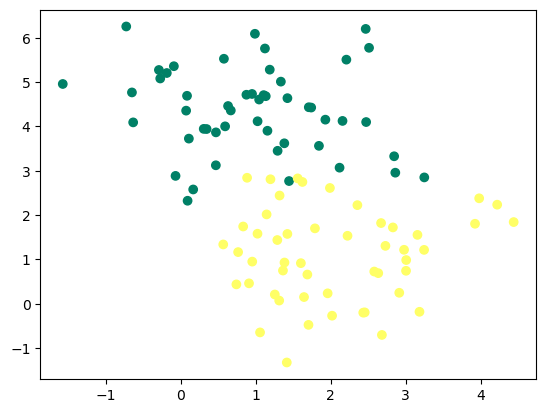

In [99]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")

In [100]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [101]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1/(1 + np.exp(-Z))
    return A


In [102]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1-y) * np.log(1 - A + epsilon))

In [103]:
def gradients(A, X, y):
    dW = 1/len(y) * np.dot(X.T, A-y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [104]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [105]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [114]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.01, n_iter = 10000):
    W, b = initialisation(X_train)

    Loss_train = []
    Loss_test = []
    acc_train = []
    acc_test = []

    for i in tqdm(range(n_iter)):

        A = model(X_train, W, b)

        if i % 10 == 0:
            # Train
            loss = log_loss(A, y_train)
            Loss_train.append(loss)
            y_pred = predict(X_train, W, b)
            acc_train.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            loss = log_loss(A_test, y_test)
            Loss_test.append(loss)
            y_pred = predict(X_test, W, b)
            acc_test.append(accuracy_score(y_test, y_pred))
        

        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    plt.plot(Loss_train, label="Loss train")
    plt.plot(Loss_test, label="Loss test")
    plt.legend()
    plt.show()
    plt.plot(acc_train, label="Acc train")
    plt.plot(acc_test, label="Acc test")
    plt.legend()
    plt.show()

    return (W, b)

In [107]:
# W, b = artificial_neuron(X, y)
# new_plant = np.array([2,1])

# x0 = np.linspace(-1,4, 100)
# x1 = (-W[0]*x0 - b) / W[1]

# plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")
# plt.scatter(new_plant[0], new_plant[1], c="r")
# plt.plot(x0, x1, c="blue")

# plt.show()


# Chat VS Chien

In [108]:
!pip install h5py
from utilities import *

In [109]:
X_train, y_train, X_test, y_test = load_data()

In [112]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

100%|██████████| 10000/10000 [00:21<00:00, 471.84it/s]


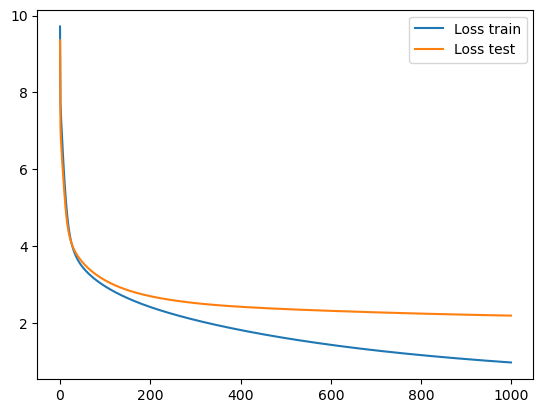

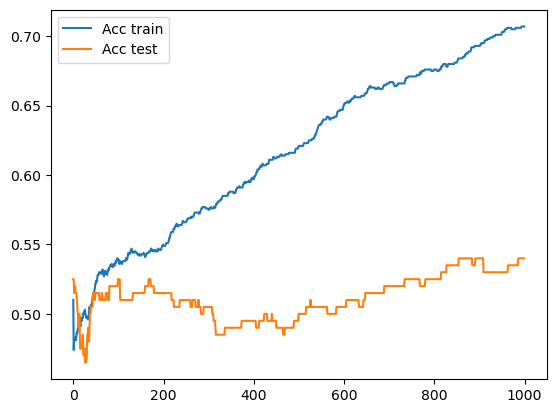

In [115]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test)